<div style="text-align: center; font-size: 24pt; font-weight: bold;">
Movie Review Sentiment Analysis
</div>

<div style="text-align: center; font-size: 18pt;">
An Exploration of Unstructured Text Through NLP and Machine Learning
</div>

<div style="text-align: center; margin-top: 20px;">
<strong>Derek Eodice, MBA, MSc</strong><br>
</div>

<div style="text-align: center; margin-top: 20px;">
January 21, 2026
</div>

# Abstract
<p>This project focuses on the sentiment analysis of the Kaggle Movie Review dataset. The dataset contains 156,000 separate reviews. Each review contains sentiments ranging from negative to positive. The goal of this project is to develop and evaluate features using NLP to classify movie review sentiments.</p> 
<p>The dataset, originally derived from Rotten Tomatoes, was preprocessed by tokenizing text, removing punctuation and lowercasing the words, all common preprocessing methods in text mining. Features were then extracted using  a bag-of-words approach and supplemented using sentiment scores computed by TextBlob and NLTK’s Sentiment Intensity Analyzer. Finally, a Naïve Bayes classifier was trained and evaluated using cross-validation to measure accuracy, precision, recall, and F1 scores.</p>
<p>The experiments revealed that integrating sentiment polarity scores improved classification accuracy compared to the baseline established with unigrams. The visualizations within this report highlight and analyze the distribution of predicted vs actual sentiments, showing a majority result for neutral phrases. Challenges for this project included handling of short phrases with ambiguity along with the computational constraints of the dataset (overall size). The result of this project demonstrates the effectiveness of combining lexical and sentiment-based features for sentiment classification. The results also demonstrate potential applications in review analysis automation. Future work in this area could investigate results with bigram features, more advanced lexicons (e.g. LIWC), or alternative classifiers available in Scikit-learn.</p> 

# Table of Contents

- [Abstract](#abstract)
- [Introduction](#introduction)
- [Data](#data)
- [Methodology](#methodology)
- [Experiments and Results](#experiments-and-results)
- [Model Selection](#model-selection)
- [Advanced Linguistic Analysis (SpaCy)](#spacy)
- [Topic Modelling](#topic-modelling)
- [Conclusion](#conclusion)

# Introduction
<p>Sentiment analysis is a common topic in both text mining and NLP. Companies regularly mine reviews and social media posts for sentiment on their products or offerings. This is an especially common practice in the entertainment industry, where customer sentiment heavily drives revenue. One of the more well-known datasets in this space is Sentiment Analysis on movie reviews. User reviews are a critical signal for understanding audience satisfaction and content quality. Platforms like Netflix rely on sentiment signals to inform content recommendations, merchandising, and production decisions. In this project, I build and evaluate NLP models to classify movie reviews as positive or negative, and analyze how model performance impacts downstream product decisions. This dataset was used in a competition hosted on Kaggle for machine learning enthusiasts to test their ability to accurately predict the sentiments using various ML, text mining and NLP applications.</p>

# Data
<p>Our full dataset from Kaggle contains 156,060 individual reviews. The data was sourced from the Pang and Lee movie review corpus, and the reviews were based on the Rotten Tomatoes website. The original sentiment scores are scored from 0 (very negative) up to 4 (very positive). The original sentiment analysis was conducted by Socher et al using crowd-sourcing to manually annotate subphrases with the following options: “negative”, “somewhat negative”, “neutral”, “somewhat positive” and “positive”. For further reading on either of these areas, please visit the following websites:</p>
- https://nlp.stanford.edu/sentiment/ (Sentiment Analysis)<br>
- https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews (Kaggle Movie Reviews)<br>

# Methodology
<p>The methodology for this project is split into multiple tasks. The data will first be loaded into the jupyter notebook and preprocessed to remove stop words, tokenize the text, change all words to lowercase and then lemmatize the text. This preprocessing will ensure uniformity and elimination of high frequency stop words (e.g. of, to, and, for) that could negatively impact our sentiment analysis.</p>
<p>The second step in the investigation strategy will be to vectorize the text using a TF-IDF vectorizer. The text will need to be vectorized prior to model creation (the next step) content in question, check the size of the vocabulary and check the word index in the vocabulary. The third and final major task will be model evaluation. This project will analyze the text in question via Multinomial Naïve Bayes (hereon referred to as MNB), and support vector model (SVM). Model evaluation and selection will be based on accuracy, precision, recall and F1 scores. </p>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus.reader import reviews
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from IPython.display import display, Markdown
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
# nltk.download('wordnet')

# Read the files
try: 
    train = pd.read_csv("train.tsv", sep='\t')
    test = pd.read_csv("test.tsv", sep='\t')
    import string
    # Preprocess text to tokenize text and remove punctuation
    def preprocess_text(text):
        """Tokenizes text and removes punctuation."""

        # 1. Convert to lowercase:
        text = text.lower()

        # 2. Remove punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))

        # 3. Tokenize:
        tokens = nltk.word_tokenize(text)

        return tokens
    
    train['Tokens'] = train['Phrase'].apply(lambda x: preprocess_text(str(x)))

    X = train[['PhraseId', 'SentenceId', 'Sentiment']].values

    # Standardize the features for better clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    

    # Function to compute sentiment polarity
    def get_sentiment(text):
        return TextBlob(str(text)).sentiment.polarity


    # Apply sentiment analysis
    train['sentiment_score'] = train['Phrase'].apply(get_sentiment)

    sia = SentimentIntensityAnalyzer()

    def get_sentiment(text):
        """Classifies sentiment as positive, neutral, or negative."""
        score = sia.polarity_scores(str(text))['compound']
        if score >= 0.5:
            return "positive"
        elif score > 0.25:
            return "somewhat positive"
        elif score <= -0.25:
            return "negative"
        elif score < -0.05:
            return "somewhat negative"   
        else:
            return "neutral"
    train['sentiment'] = train['Phrase'].apply(get_sentiment)
except Exception as e:
    print(f"An error occurred: {e}")

In [2]:
report = f"""
### Data Import and Inspection

---

Our first step is to import our data from Kaggle (full link found in introduction). It is important to remember that both the test and training datasets be loaded for an effective analysis.
As this project incorporates NLP, text mining and machine learning, we'll need to import several packages from NLTK and SKLearn to:

- Tokenize text
- Remove stopwords
- Score sentiment intensity
- Scale the data

We've also created a custom function using polarity scores from `SentimentIntensityAnalyzer` to classify sentiment into one of five categories: positive, somewhat positive, 
neutral, somewhat negative and negative.

Prior to proceeding, we will inspect the first 5 rows of our dataframe for the changes we've made.

**Training Data - Updated with Sentiment, Sentiment Scores and Tokenization**<br>
{train.head().to_markdown()}

----

At first glance, our updates have been successful. We will now test the `sentiment_score` column to fully verify our updates. 
If successful, we will proceed to exploratory data analysis (EDA) in the next section.

**`sentiment_score`**<br>
{train['sentiment_score'].describe().round(3).to_markdown()}<br>

Our polarity scores calculated using `SentimentIntensityAnalyzer` were successful. We will now proceed to EDA.
"""

display(Markdown(report))


### Data Import and Inspection

---

Our first step is to import our data from Kaggle (full link found in introduction). It is important to remember that both the test and training datasets be loaded for an effective analysis.
As this project incorporates NLP, text mining and machine learning, we'll need to import several packages from NLTK and SKLearn to:

- Tokenize text
- Remove stopwords
- Score sentiment intensity
- Scale the data

We've also created a custom function using polarity scores from `SentimentIntensityAnalyzer` to classify sentiment into one of five categories: positive, somewhat positive, 
neutral, somewhat negative and negative.

Prior to proceeding, we will inspect the first 5 rows of our dataframe for the changes we've made.

**Training Data - Updated with Sentiment, Sentiment Scores and Tokenization**<br>
|    |   PhraseId |   SentenceId | Phrase                                                                                                                                                                                       |   Sentiment | Tokens                                                                                                                                                                                                                                                                                             |   sentiment_score | sentiment         |
|---:|-----------:|-------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------:|:------------------|
|  0 |          1 |            1 | A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . |           1 | ['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story'] |               0.4 | positive          |
|  1 |          2 |            1 | A series of escapades demonstrating the adage that what is good for the goose                                                                                                                |           2 | ['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose']                                                                                                                                                                           |               0.7 | somewhat positive |
|  2 |          3 |            1 | A series                                                                                                                                                                                     |           2 | ['a', 'series']                                                                                                                                                                                                                                                                                    |               0   | neutral           |
|  3 |          4 |            1 | A                                                                                                                                                                                            |           2 | ['a']                                                                                                                                                                                                                                                                                              |               0   | neutral           |
|  4 |          5 |            1 | series                                                                                                                                                                                       |           2 | ['series']                                                                                                                                                                                                                                                                                         |               0   | neutral           |

----

At first glance, our updates have been successful. We will now test the `sentiment_score` column to fully verify our updates. 
If successful, we will proceed to exploratory data analysis (EDA) in the next section.

**`sentiment_score`**<br>
|       |   sentiment_score |
|:------|------------------:|
| count |        156060     |
| mean  |             0.057 |
| std   |             0.267 |
| min   |            -1     |
| 25%   |             0     |
| 50%   |             0     |
| 75%   |             0.125 |
| max   |             1     |<br>

Our polarity scores calculated using `SentimentIntensityAnalyzer` were successful. We will now proceed to EDA.


# Experiments and Results

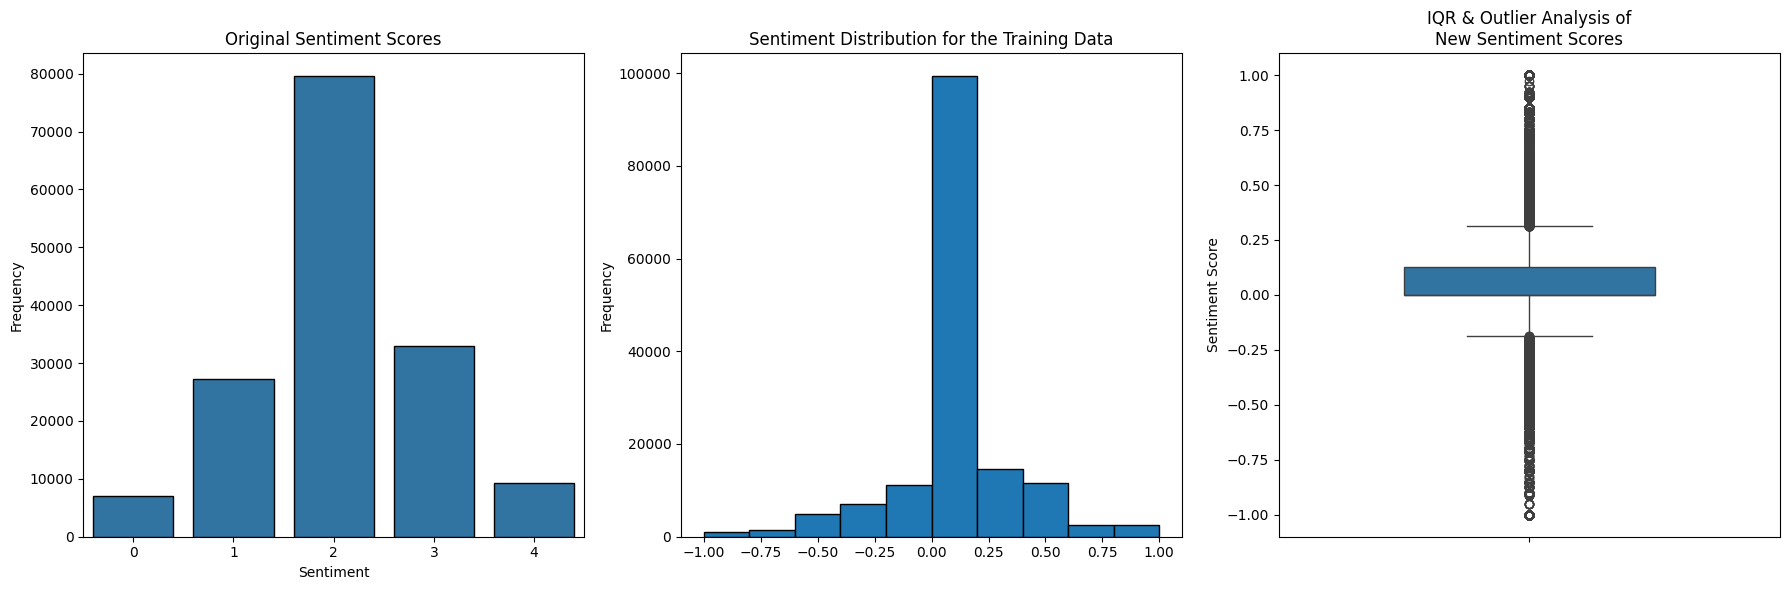


## Initial Exploratory Data Analysis

---

The first experiment in our analysis is the exploratory data analysis (hereon referred to as EDA). Our training dataset contains 156,060 reviews
with a mean of 0.057, a minimum score of -1.0 and a maximum score of 1.0,
indicating that most reviews are mostly neutral but lean positive. At first glance, it’s clear that though the data presents an unusually high kurtosis, 
denoting a possible class imbalance. However, despite the high kurtosis, the data is still normally distributed overall. Of additional interest, our data presents a high number of data points both above 0.25 and below -0.25. 
The outliers themselves are not cause for concern, given both the shape of our data and the goal of the project itself.

**Sentiment Score Summary**
|       |   sentiment_score |
|:------|------------------:|
| count |        156060     |
| mean  |             0.057 |
| std   |             0.267 |
| min   |            -1     |
| 25%   |             0     |
| 50%   |             0     |
| 75%   |             0.125 |
| max   |             1     |




In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns

# Plot 1: Countplot for Original Sentiment Scores
sns.countplot(data=train, x = 'Sentiment', ax=axes[0], edgecolor = 'black')
axes[0].set_title('Original Sentiment Scores')
axes[0].set_ylabel('Frequency')

# Plot 2: Histogram for Sentiment Distribution
axes[1].hist(data=train, x = 'sentiment_score' ,bins=10, edgecolor = 'black')
axes[1].set_title('Sentiment Distribution for the Training Data')
axes[1].set_ylabel('Frequency')

# Plot 3: Boxplot for IQR & Outlier Analysis
sns.boxplot(data=train, y = 'sentiment_score', width= 0.5, ax=axes[2])
axes[2].set_title('IQR & Outlier Analysis of\nNew Sentiment Scores')
axes[2].set_ylabel('Sentiment Score')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

report = f"""
## Initial Exploratory Data Analysis

---

The first experiment in our analysis is the exploratory data analysis (hereon referred to as EDA). Our training dataset contains {len(train):,.0f} reviews
with a mean of {train['sentiment_score'].mean():.3f}, a minimum score of {train['sentiment_score'].min()} and a maximum score of {train['sentiment_score'].max()},
indicating that most reviews are mostly neutral but lean positive. At first glance, it’s clear that though the data presents an unusually high kurtosis, 
denoting a possible class imbalance. However, despite the high kurtosis, the data is still normally distributed overall. Of additional interest, our data presents a high number of data points both above 0.25 and below -0.25. 
The outliers themselves are not cause for concern, given both the shape of our data and the goal of the project itself.

**Sentiment Score Summary**
{train['sentiment_score'].describe().round(3).to_markdown()}


"""

# print(f"Sentiment Score Summary:\n{pd.DataFrame(train['sentiment_score'].describe().round(3))}")

display(Markdown(report))

# Model Selection
<p>With the initial EDA established, the next experiment is to vectorize the data with both Multinomial Naïve Bayes and Support Vector Model (hereon referred to as MNB and SVM respectively) classifiers. With respect to the data set’s size and the computational power at hand, stop words were removed and the remaining words were lemmatized. Training data was also reduced to 5,000 samples to provide the most accurate data set with respect to processing time constraints.  Prior to training the models themselves, features were extracted using a TFIDF vectorizer (max_features to 2,000), and the train/test split was set at 80/20.</p>

<p>For the SVM classifier, iterations were set to 2,000 to optimize results given the available computing power. Weighted averages were used when calculating the precision, recall and F1 scores for the SVM classifier to best mitigate unusual test results across iterations. While max iterations were not set for MNB, weighted averages were also used for the MNB classifier to mitigate anomalous results.</p>

In [ ]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.exceptions import ConvergenceWarning

# This is a BIG dataset. Remove stop words and lemmatize the tokens to reduce processing time.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the data
def preprocess_text(text):
    # Implement text preprocessing steps here
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

train_sample = train.sample(n=5000, random_state=42) # Sample 5000 to keep processing time down.
train_sample['cleaned_comments'] = train_sample['Phrase'].apply(preprocess_text)
train_sample['cleaned_comments'] = train_sample['cleaned_comments'].fillna('')

# Feature Extraction
tfitrain = TfidfVectorizer(max_features=2000)
X = tfitrain.fit_transform(train_sample['cleaned_comments']).toarray()
y = train_sample['sentiment']  # Assuming 'sentiment' is the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = LinearSVC(dual=False, max_iter=5000)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted', zero_division=0)

# Train MNB model
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
mnb_predictions = mnb_model.predict(X_test)

# Evaluate MNB model
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
mnb_precision = precision_score(y_test, mnb_predictions, average='weighted', zero_division=0)
mnb_recall = recall_score(y_test, mnb_predictions, average='weighted')
mnb_f1 = f1_score(y_test, mnb_predictions, average='weighted', zero_division=0)


# Determine the best model
if svm_f1 > mnb_f1:
    best_model = svm_model
    print("SVM is the best model.")
else:
    best_model = mnb_model
    print("MNB is the best model.")

# Predict sentiment scores using the best model
train_sample['predicted_sentiment'] = best_model.predict(X)


report = f"""
## Model Performance

---

While the results between the models were comparable, SVM outperformed MNB in all 4 categories. 
Of particular interest, the SVM model obtained a higher F1-Score higher than the MNB model. 
Given SVM’s performance across accuracy, precision, recall and the F1-Score, we will use the SVM model for the duration of our experiment.

**SVM Metrics**<br>
Accuracy: {svm_accuracy:.4f}<br>
Precision : {svm_precision:.4f}<br>
Recall: {svm_recall:.4f}<br>
F1: {svm_f1:.4f}<br>

\n**MNB Metrics**<br>
Accuracy: {mnb_accuracy:.4f}<br>
Precision : {mnb_precision:.4f}<br>
Recall: {mnb_recall:.4f}<br>
F1: {mnb_f1:.4f}<br>

\n\nNext, let's explore the first 5 columns of the predicted results:
{train_sample[['cleaned_comments', 'sentiment', 'predicted_sentiment']].head().to_markdown()}
"""

display(Markdown(report))

SVM is the best model.



## Model Performance

---

While the results between the models were comparable, SVM outperformed MNB in all 4 categories. 
Of particular interest, the SVM model obtained a higher F1-Score higher than the MNB model. 
Given SVM’s performance across accuracy, precision, recall and the F1-Score, we will use the SVM model for the duration of our experiment.

**SVM Metrics**<br>
Accuracy: 0.7180<br>
Precision : 0.6932<br>
Recall: 0.7180<br>
F1: 0.6937<br>


**MNB Metrics**<br>
Accuracy: 0.6230<br>
Precision : 0.6418<br>
Recall: 0.6230<br>
F1: 0.5233<br>



Next, let's explore the first 5 columns of the predicted results:
|        | cleaned_comments                                                                        | sentiment         | predicted_sentiment   |
|-------:|:----------------------------------------------------------------------------------------|:------------------|:----------------------|
|  95722 | sorry                                                                                   | somewhat negative | somewhat negative     |
| 147312 | romantic comedy dogme 95 filmmaking may seem odd bedfellow turn delightfully compatible | positive          | positive              |
|  36991 | day                                                                                     | neutral           | neutral               |
| 150211 | flinch unsettling prognosis                                                             | neutral           | neutral               |
| 140655 | clinically depressed                                                                    | negative          | neutral               |



To get a full understanding of our results, we'll perform a side-by-side comparison of our predictions against the original results.

**Original Data**

Total occurrences (original data): 5,000<br>
    - Number of 'negative' occurrences: 559<br>
    - Number of 'somewhat negative' occurrences: 93<br>
    - Number of 'neutral' occurrences: 3,216<br>
    - Number of 'somewhat positive' occurrences: 589<br>
    - Percentage of 'negative' occurrences: 11.18%<br>
    - Percentage of 'somewhat negative' occurrences: 1.86%<br>
    - Percentage of 'neutral' occurrences: 64.32%<br>
    - Percentage of 'somewhat positive' occurrences: 11.78%<br>
    - Percentage of 'positive' occurrences: 10.86%<br>

**Predictions**

Total predictions: 5,000<br>
    - Number of 'negative' predictions: 559<br>
    - Number of 'somewhat negative' predictions: 93<br>
    - Number of 'neutral' predictions: 3,216<br>
    - Number of 'somewhat negative' predictions: 93<br>
    - Percentage of 'negative' predictions: 11.18%<br>
    - Percentage of 'somewhat negative' predictions: 1.86%<br>
    - Percentage of 'neutral' predictions: 64.32%<br>
    - Percentage of 'somewhat positive' predictions: 11.78%<br>


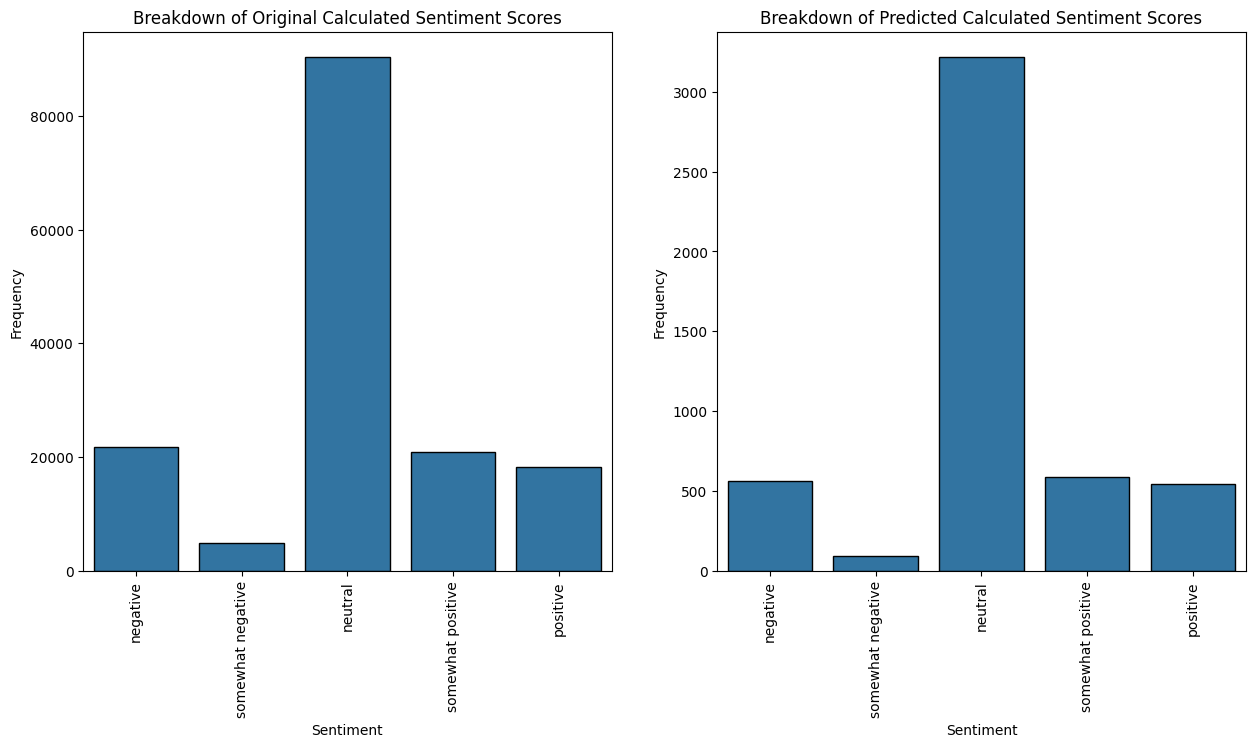

In [5]:
# Side by side comparison
# ORIGINAL DATA -----------------------------------------------------------------------------
# Filter rows by predicted sentiment
negative_original = train_sample[train_sample['sentiment'] == 'negative']
somewhat_negative_original = train_sample[train_sample['sentiment'] == 'somewhat negative']
neutral_original = train_sample[train_sample['sentiment'] == 'neutral']
somewhat_positive_original = train_sample[train_sample['sentiment'] == 'somewhat positive']
positive_original = train_sample[train_sample['sentiment'] == 'positive']

# Count the number of 'somewhat negative' occurrences
negative_count = len(negative_original)
somewhat_negative_count = len(somewhat_negative_original)
neutral_count = len(neutral_original)
somewhat_positive_count = len(somewhat_positive_original)
positive_count = len(positive_original)

# Total number of occurrences (rows in train_sample)
total_original = len(train_sample)

# Compute the proportion and percentage
negative_proportion = negative_count / total_original
negative_percentage = negative_proportion * 100

somewhat_negative_proportion = somewhat_negative_count / total_original
somewhat_negative_percentage = somewhat_negative_proportion * 100

neutral_proportion = neutral_count / total_original
neutral_percentage = neutral_proportion * 100

somewhat_positive_proportion = somewhat_positive_count / total_original
somewhat_positive_percentage = somewhat_positive_proportion * 100

positive_proportion = positive_count / total_original
positive_percentage = positive_proportion * 100

# PREDICTIONS ------------------------------------------------------------------------------------
# Filter rows where predicted_sentiment is 'somewhat negative'
negative_pred = train_sample[train_sample['predicted_sentiment'] == 'negative']
somewhat_negative_pred = train_sample[train_sample['predicted_sentiment'] == 'somewhat negative']
neutral_pred = train_sample[train_sample['predicted_sentiment'] == 'neutral']
somewhat_positive_pred = train_sample[train_sample['predicted_sentiment'] == 'somewhat positive']
positive_pred = train_sample[train_sample['predicted_sentiment'] == 'positive']

# Count the number of 'somewhat negative' predictions
negative_count = len(negative_pred)
somewhat_negative_count = len(somewhat_negative_pred)
neutral_count = len(neutral_pred)
somewhat_positive_count = len(somewhat_positive_pred)
positive_count = len(positive_pred)

# Total number of predictions (rows in train_sample)
total_predictions = len(train_sample)

# Compute the proportion and percentage
negative_proportion = negative_count / total_predictions
negative_percentage = negative_proportion * 100

somewhat_negative_proportion = somewhat_negative_count / total_predictions
somewhat_negative_percentage = somewhat_negative_proportion * 100

neutral_proportion = neutral_count / total_predictions
neutral_percentage = neutral_proportion * 100

somewhat_positive_proportion = somewhat_positive_count / total_predictions
somewhat_positive_percentage = somewhat_positive_proportion * 100

positive_proportion = positive_count / total_predictions
positive_percentage = positive_proportion * 100

report = f"""
To get a full understanding of our results, we'll perform a side-by-side comparison of our predictions against the original results.

**Original Data**

Total occurrences (original data): {total_original:,.0f}<br>
    - Number of 'negative' occurrences: {negative_count:,.0f}<br>
    - Number of 'somewhat negative' occurrences: {somewhat_negative_count:,.0f}<br>
    - Number of 'neutral' occurrences: {neutral_count:,.0f}<br>
    - Number of 'somewhat positive' occurrences: {somewhat_positive_count:,.0f}<br>
    - Percentage of 'negative' occurrences: {negative_percentage:.2f}%<br>
    - Percentage of 'somewhat negative' occurrences: {somewhat_negative_percentage:.2f}%<br>
    - Percentage of 'neutral' occurrences: {neutral_percentage:.2f}%<br>
    - Percentage of 'somewhat positive' occurrences: {somewhat_positive_percentage:.2f}%<br>
    - Percentage of 'positive' occurrences: {positive_percentage:.2f}%<br>

**Predictions**

Total predictions: {total_predictions:,.0f}<br>
    - Number of 'negative' predictions: {negative_count:,.0f}<br>
    - Number of 'somewhat negative' predictions: {somewhat_negative_count:,.0f}<br>
    - Number of 'neutral' predictions: {neutral_count:,.0f}<br>
    - Number of 'somewhat negative' predictions: {somewhat_negative_count:,.0f}<br>
    - Percentage of 'negative' predictions: {negative_percentage:.2f}%<br>
    - Percentage of 'somewhat negative' predictions: {somewhat_negative_percentage:.2f}%<br>
    - Percentage of 'neutral' predictions: {neutral_percentage:.2f}%<br>
    - Percentage of 'somewhat positive' predictions: {somewhat_positive_percentage:.2f}%<br>
"""
display(Markdown(report))
# Revisit the first countplot and plot along side the predicted countplot
import matplotlib.pyplot as plt
import numpy as np
# Create an order of the sentiments for better visualization
sentiment_order = ['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Original Sentiment Scores
sns.countplot(data=train, x='sentiment', ax=ax1, order=sentiment_order, edgecolor = 'black')
ax1.set_title('Breakdown of Original Calculated Sentiment Scores')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Sentiment')
ax1.tick_params(axis='x', rotation=90)

# Plot 2: Predicted Sentiment Scores
sns.countplot(data=train_sample, x='predicted_sentiment', ax=ax2, order=sentiment_order, edgecolor = 'black')
ax2.set_title('Breakdown of Predicted Calculated Sentiment Scores')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Sentiment')
ax2.tick_params(axis='x', rotation=90)

The SVM model performed relatively well when compared to the original data. While the model did predict more negative reviews than what was provided in the training data, the remaining sentiments were predicted relatively well given the available information and model parameters. However, our analysis thus far trends towards a class imbalance. To confirm this, we will now create a confusion matrix and compare side-by-side with the predicted sentiments.

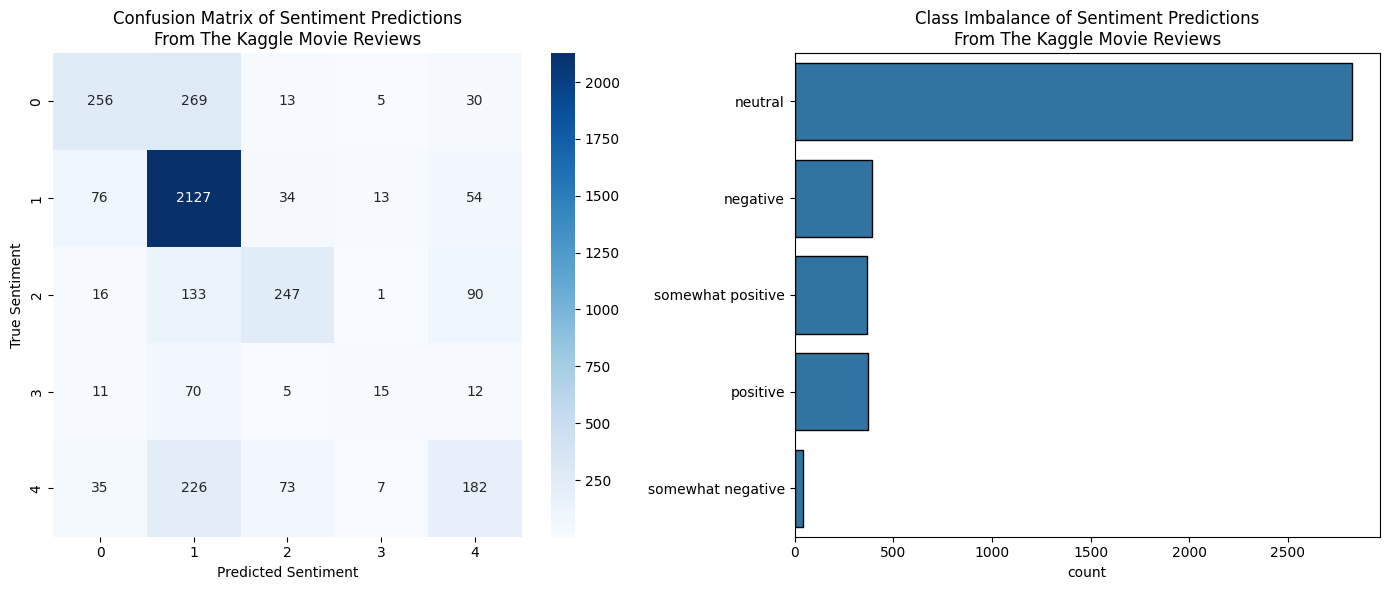

In [6]:
import matplotlib.pyplot as plt

# Use the best model from above, cross validate and create confusion matrices
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(svm_model, X_train, y_train, cv = 5)


# Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix of Sentiment Predictions\nFrom The Kaggle Movie Reviews')
axes[0].set_xlabel('Predicted Sentiment')
axes[0].set_ylabel('True Sentiment')

sns.countplot(data=y_train_pred, ax=axes[1], edgecolor = 'black')
axes[1].set_title('Class Imbalance of Sentiment Predictions\nFrom The Kaggle Movie Reviews')

plt.tight_layout()
plt.show()

As predicted, the high kurtosis in the EDA properly indicated a class imbalance. While our initial model correctly predicted the neutral reviews, correct predictions for the other review classes were lacking. To bolster our model prior to moving forward, we will implement SMOTE (Synthetic Minority Oversampling Technique) and reevaluate.

In [7]:
import string # Import string module for punctuation removal
import nltk # Import nltk for word_tokenize
from imblearn.over_sampling import SMOTE # Import SMOTE

# Preprocess the data
def preprocess_text(text):
    # Implement text preprocessing steps here
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

train_sample = train.sample(n=5000, random_state=42) # Sample 5000 to keep processing time down.
train_sample['cleaned_comments'] = train_sample['Phrase'].apply(preprocess_text)
train_sample['cleaned_comments'] = train_sample['cleaned_comments'].fillna('')

# Feature Extraction
tfitrain = TfidfVectorizer(max_features=2000)
X = tfitrain.fit_transform(train_sample['cleaned_comments']).toarray()
y = train_sample['sentiment']   # Assuming 'sentiment' is the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

report = f"""
### Application of SMOTE

---


To ensure we maintain continuity, we will tokenize and lemmatize our text prior to implementing SMOTE. We will also keep the same number of samples (5,000) and set the maximum number of features to 2,000.

*X and Y Train Shapes Pre-SMOTE*<br>
- Shape of X_train before SMOTE: {X_train.shape}<br>
- Shape of y_train before SMOTE: {y_train.shape}<br>
- Class distribution of y_train before SMOTE: {y_train.value_counts()}

*X and Y Train Shapes After SMOTE*<br>
- Shape of X_train after SMOTE: {X_train_res.shape}<br>
- Shape of y_train after SMOTE: {y_train_res.shape}<br>
- Class distribution of y_train before SMOTE:{y_train_res.value_counts()}
"""
display(Markdown(report))

# Train SVM model
# Train with the resampled data
svm_model = LinearSVC(dual=False, max_iter=5000, random_state = 42) # Added random_state for reproducibility
svm_model.fit(X_train_res, y_train_res) # Use resampled data
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted', zero_division=0) # Added zero_division
svm_recall = recall_score(y_test, svm_predictions, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted', zero_division=0)

# Train MNB model
# Train with the resampled data
mnb_model = MultinomialNB()
mnb_model.fit(X_train_res, y_train_res) # Use resampled data
mnb_predictions = mnb_model.predict(X_test)

# Evaluate MNB model
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
mnb_precision = precision_score(y_test, mnb_predictions, average='weighted', zero_division=0)
mnb_recall = recall_score(y_test, mnb_predictions, average='weighted', zero_division=0)
mnb_f1 = f1_score(y_test, mnb_predictions, average='weighted', zero_division=0)

# Compare the models
if svm_f1 > mnb_f1:
    best_model = svm_model
else:
    best_model = mnb_model

train_sample['predicted_sentiment'] = best_model.predict(X)

report = f""" 
### Model Comparison

---

*SVM Metrics*<br>
Accuracy: {svm_accuracy:.4f}<br>
Precision: {svm_precision:.4f}<br>
Recall: {svm_recall:.4f}<br>
F1-Score: {svm_f1:.4f}<br>

*MNB Metrics*<br>
Accuracy: {mnb_accuracy:.4f}<br>
Precision: {mnb_precision:.4f}<br>
Recall: {mnb_recall:.4f}<br>
F1-Score: {mnb_f1:.4f}<br>

**Best Model:** {best_model}

Let's take a look at the first 5 rows of the results:
{train_sample[['cleaned_comments', 'sentiment', 'predicted_sentiment']].head().to_markdown()}
"""
display(Markdown(report))



### Application of SMOTE

---


To ensure we maintain continuity, we will tokenize and lemmatize our text prior to implementing SMOTE. We will also keep the same number of samples (5,000) and set the maximum number of features to 2,000.

*X and Y Train Shapes Pre-SMOTE*<br>
- Shape of X_train before SMOTE: (4000, 2000)<br>
- Shape of y_train before SMOTE: (4000,)<br>
- Class distribution of y_train before SMOTE: sentiment
neutral              2304
negative              573
somewhat positive     523
positive              487
somewhat negative     113
Name: count, dtype: int64

*X and Y Train Shapes After SMOTE*<br>
- Shape of X_train after SMOTE: (11520, 2000)<br>
- Shape of y_train after SMOTE: (11520,)<br>
- Class distribution of y_train before SMOTE:sentiment
neutral              2304
negative             2304
somewhat negative    2304
somewhat positive    2304
positive             2304
Name: count, dtype: int64


 
### Model Comparison

---

*SVM Metrics*<br>
Accuracy: 0.6080<br>
Precision: 0.6501<br>
Recall: 0.6080<br>
F1-Score: 0.6232<br>

*MNB Metrics*<br>
Accuracy: 0.4270<br>
Precision: 0.5970<br>
Recall: 0.4270<br>
F1-Score: 0.4483<br>

**Best Model:** LinearSVC(dual=False, max_iter=5000, random_state=42)

Let's take a look at the first 5 rows of the results:
|        | cleaned_comments                                                                        | sentiment         | predicted_sentiment   |
|-------:|:----------------------------------------------------------------------------------------|:------------------|:----------------------|
|  95722 | sorry                                                                                   | somewhat negative | somewhat negative     |
| 147312 | romantic comedy dogme 95 filmmaking may seem odd bedfellow turn delightfully compatible | positive          | positive              |
|  36991 | day                                                                                     | neutral           | negative              |
| 150211 | flinch unsettling prognosis                                                             | neutral           | neutral               |
| 140655 | clinically depressed                                                                    | negative          | neutral               |


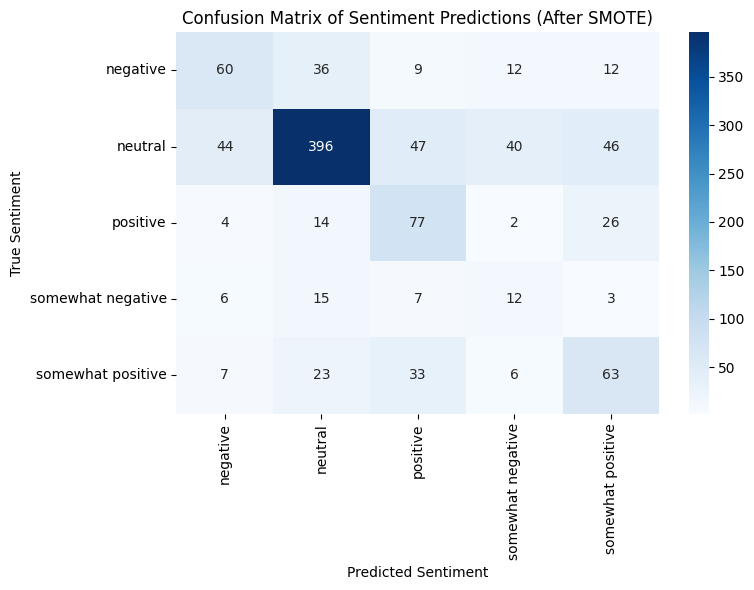

Confusion Matrix (After SMOTE):
[[ 60  36   9  12  12]
 [ 44 396  47  40  46]
 [  4  14  77   2  26]
 [  6  15   7  12   3]
 [  7  23  33   6  63]]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np # Import numpy if you use np.unique

# Get predictions from the best model on the original (non-SMOTEd) test set
y_pred_smote = best_model.predict(X_test)

# Generate the confusion matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Define class labels for better readability on the heatmap

class_labels = np.unique(y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix of Sentiment Predictions (After SMOTE)')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.tight_layout()
plt.show()

# You can also print the confusion matrix values
print("Confusion Matrix (After SMOTE):")
print(cm_smote)

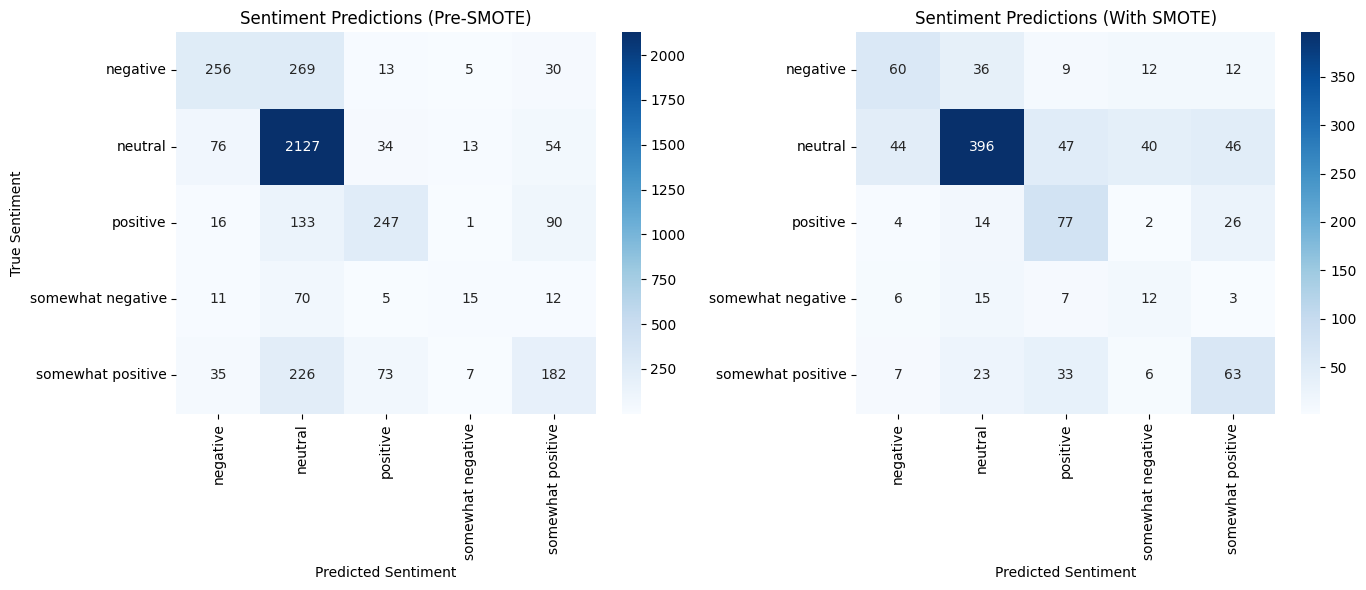

In [9]:
# Confusion Matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Sentiment Predictions (Pre-SMOTE)')
axes[0].set_xlabel('Predicted Sentiment')
axes[0].set_ylabel('True Sentiment')

sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Sentiment Predictions (With SMOTE)')
axes[1].set_xlabel('Predicted Sentiment')

plt.tight_layout()
plt.show()

<p>After implementing SMOTE, our revised model achieved better performance. First, the model with SMOTE achieved a more balanced recall for the minority classes. With the original model, many of the ‘somewhat negative’ and ‘somewhat positive’ classes had low predictions and were incorrectly misclassified into either ‘negative’ or ‘neutral’. As shown above, our model better represented these classes after implementing SMOTE.</p>

<p>Second, our model demonstrated reduced major misclassifications after implementing SMOTE. While the original model correctly predicted a higher number of ‘neutral’ predictions, it also had a higher level of misclassifications amongst other major sentiments. This issue was rectified after implementing SMOTE, as we achieved better scores for both the ‘negative’ and ‘positive’ labels.</p>

<p>Finally, our model achieved better recall for both the ‘negative’ and ‘positive’ classes after implementing SMOTE. While the original model incorrectly predicted many ‘negative’ or ‘positive’ instances as ‘neutral’, SMOTE better distinguished these and correctly handled the associated class imbalance.</p>


# Advanced Linguistic Analysis (SpaCy)

To further refine our understanding of the dataset and improve the quality of our text features, we transitioned from NLTK to **SpaCy**. While NLTK provided a solid baseline, SpaCy offers context-aware lemmatization and Named Entity Recognition (NER), which allows us to identify specific industry entities like actors, directors, and film titles. This section explores how advanced linguistic processing differs from basic tokenization and provides a visual map of the entities within the reviews.

In [10]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

# Now, implement SpaCy on your training data
nlp = spacy.load('en_core_web_sm')

def spacy_preprocess(text):
    # Process the text with SpaCy
    doc = nlp(text.lower())
    
    # Keep the token ONLY if it is NOT a stop word AND NOT punctuation
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    return " ".join(tokens)

# Apply this function to the training data
train_sample['spacy_cleaned'] = train_sample['Phrase'].apply(spacy_preprocess)

# test your work
pd.DataFrame(train_sample[['Phrase', 'cleaned_comments', 'spacy_cleaned']]).head()

,Phrase,cleaned_comments,spacy_cleaned
95722,'s as sorry,sorry,sorry
147312,Romantic comedy and Dogme 95 filmmaking may se...,romantic comedy dogme 95 filmmaking may seem o...,romantic comedy dogme 95 filmmaking odd bedfel...
36991,of these days,day,day
150211,flinch from its unsettling prognosis,flinch unsettling prognosis,flinch unsettling prognosis
140655,are clinically depressed,clinically depressed,clinically depressed


In [11]:
pd.DataFrame(train_sample[['Phrase', 'cleaned_comments', 'spacy_cleaned']])

,Phrase,cleaned_comments,spacy_cleaned
95722,'s as sorry,sorry,sorry
147312,Romantic comedy and Dogme 95 filmmaking may se...,romantic comedy dogme 95 filmmaking may seem o...,romantic comedy dogme 95 filmmaking odd bedfel...
36991,of these days,day,day
150211,flinch from its unsettling prognosis,flinch unsettling prognosis,flinch unsettling prognosis
140655,are clinically depressed,clinically depressed,clinically depressed
...,...,...,...
110394,'ll trudge out of the theater feeling as thoug...,trudge theater feeling though rode zipper eati...,trudge theater feeling ride zipper eat corn do...
130250,at the art and the agony of making people,art agony making people,art agony make people
38141,allows the mind to enter and accept another world,allows mind enter accept another world,allow mind enter accept world
8968,Shiner,shiner,shiner


In [12]:
# Select a few interesting rows from the ORIGINAL phrase column
samples = train_sample['Phrase'].head(20).tolist()

# Process them into a list of Doc objects
docs = [nlp(text) for text in samples]

# Only keep docs that actually have entities (ents)
docs_with_ents = [doc for doc in docs if len(doc.ents) > 0]

# Check if we have anything to show before rendering
if docs_with_ents:
    displacy.render(docs_with_ents, style="ent", jupyter=True)
else:
    print("No entities found in these specific samples.")

# Topic Modelling

Building upon the linguistic insights gained from SpaCy's Named Entity Recognition, we now shift to an unsupervised perspective. While the supervised Naïve Bayes classifier, augmented with sentiment features from TextBlob and NLTK's VADER, effectively categorized reviews into negative, neutral, and positive sentiments—achieving improved accuracy through techniques like SMOTE to address class imbalances in the dataset—this approach focuses primarily on predictive labeling. To gain a more nuanced understanding of the underlying thematic structures within the reviews, we shift to an unsupervised perspective using Latent Dirichlet Allocation (LDA), also known as topic modelling. LDA allows us to discover hidden topics across the corpus, revealing patterns such as recurring motifs in plot discussions or character critiques that may not be captured by sentiment polarity alone. Following LDA topic extraction, we validate the model's coherence and separation of topics through a t-SNE visualization, which plots document-topic distributions in 2D space to confirm inter-topic distances (distinct clusters) and intra-topic cohesion (tight groupings within clusters). This unsupervised layer complements the classification results, offering exploratory insights into the dataset's semantic landscape.

To begin this process, we need to create a vectorizer with specified parameters. Our vectorizer will ignore words that appear in fewer than 2 documents or appeaer in more than 95% of the documents. We've set the stopwords to English, as this is the predominant language for our dataset. Next, we're creating a document term matrix with the vectorized version of the `cleaned_comments` column from the `train_sample` dataset. Finally, we set the number of specified topics to 5 and create a random state for reproducibility.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(train_sample['cleaned_comments'])

# Apply LDA
num_topics = 5  # Adjust number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

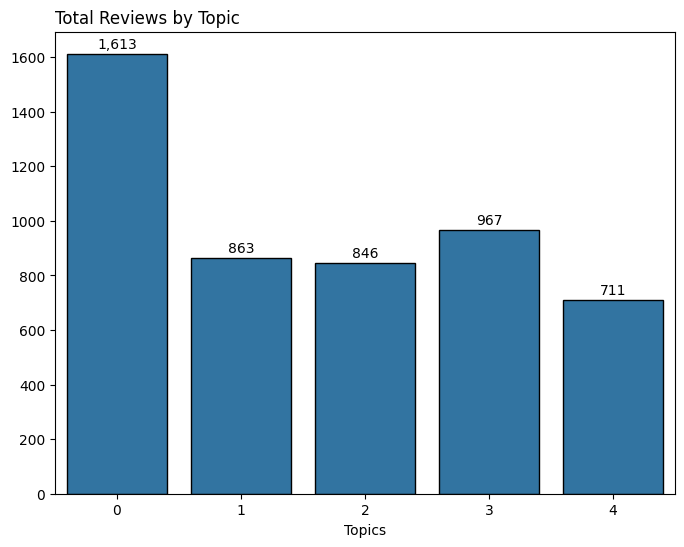

In [14]:
# Transform the data to get topic probabilities for each review
topic_probabilities = lda.transform(doc_term_matrix)

# Assign the 'dominant topic' (the one with the highest probability) to each review
train_sample['dominant_topic'] = topic_probabilities.argmax(axis=1)

# Test the code: see how many reviews fell into each topic
topic_counts = train_sample['dominant_topic'].value_counts().sort_index()

plt.figure(figsize=(8,6))

ax = sns.barplot(x=topic_counts.index, y = topic_counts.values, edgecolor = 'black')

labels = [f'{val:,}' for val in topic_counts.values]

ax.bar_label(ax.containers[0], labels = labels, padding=2)

plt.xlabel('Topics')
plt.ylabel('')
plt.title('Total Reviews by Topic', loc='left')
plt.show()


In [15]:
# Print the top words in each topic
def print_top_words(model, feature_names, n_top_words=10):
    md_text = ""
    for topic_idx, topic in enumerate(model.components_):
        md_text += f"### Topic {topic_idx + 1}:\n"
        top_words = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        md_text += f"{top_words}\n\n"
    return md_text

# print("Top words per topic:")
# print_top_words(lda, vectorizer.get_feature_names_out())

report = f"""
**Top Words per Topic:**
{print_top_words(lda, vectorizer.get_feature_names_out())}
"""

display(Markdown(report))


**Top Words per Topic:**
### Topic 1:
movie film way work thing drama bad performance story audience

### Topic 2:
like movie character comedy seen woman video humor series make

### Topic 3:
film story director best love script plot emotionally true moving

### Topic 4:
film nt rrb time lrb movie good make like funny

### Topic 5:
story life come sense watching picture year mind tale action




In [16]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

# Prepare visualization with n_jobs=1 to disable parallel processing
vis = pyLDAvis.lda_model.prepare(lda, doc_term_matrix, vectorizer, mds='tsne', n_jobs=1)

# Display in Jupyter Notebook
pyLDAvis.display(vis)

<p>Both the inter and intra-distance of our clusters is impressive. We now have 5 distinct, yet well-distanced topics. The top 30 salient terms displayed next to our graphed topics also infer our earlier findings; reviews are mostly neutral but lean positive. To solidify our findings, we will perform one final test through t-SNE (t-distributed stochastic neighbor embedding).</p>
<p>Though arguably complex, t-SNE is a powerful method that reduces deimsionality while keeping similar instances close and dissimilar instaces apart. This method is employed in unsupervised machine learning problems to visualize both inter and intra-distance of different topics. To ensure reduced dimensionality, we will limit the number of components to 2, thereby reducing the output to a mapped x and y axes. Like our initial topic modelling output, we will also set a random state to ensure reproducibility of our results at a later date.</p>

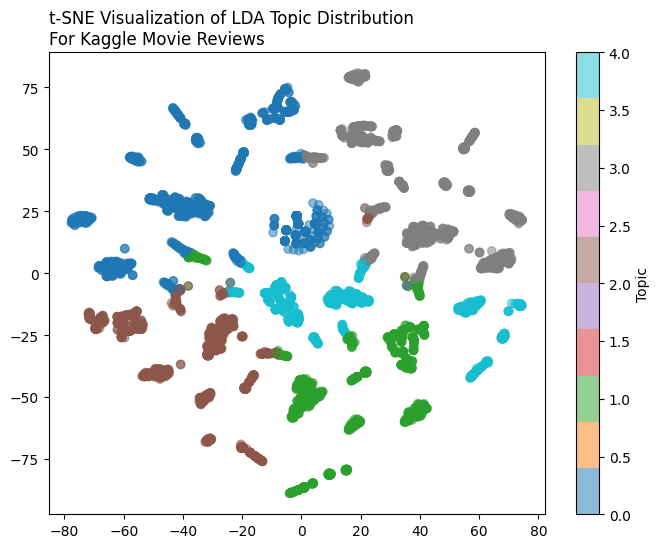

In [17]:
# Use TSNE to confirm topic distance and clustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get topic distribution for each document using the document-term matrix
doc_topic_dist = lda.transform(doc_term_matrix)  # Use doc_term_matrix instead of X

# Reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(doc_topic_dist)

# Plot documents colored by topic
dominant_topic = doc_topic_dist.argmax(axis=1)

plt.figure(figsize=(8,6))
scatter = plt.scatter(tsne_embedding[:,0], tsne_embedding[:,1],
                     c=dominant_topic, cmap='tab10', alpha=0.5)
plt.colorbar(scatter, label='Topic')
plt.title('t-SNE Visualization of LDA Topic Distribution\nFor Kaggle Movie Reviews', loc='left')
plt.show()

<p>Though the topics are closer together than in our initial inspection, the location and overall distance remains mostly the same. However, there are a few key differences. First, t-SNE revealed some overlap between topics 2 and 5. While our initial LDA visualization was intuitive, this overlap would've been difficult to capture without further analysis. Second, the topic numbers for the t-SNE visualization were changed from the LDA visualization. Though minor, this is still noteworthy as comparing the topics side-by-side on topic numbers alone could create confusion. Despite these differences, both the LDA and t-SNE visualizations are largely in lockstep.</p>

# Business Applicaiton
<p>The practical utility of this multi-layered NLP pipeline extends beyond academic classification. For stakeholders in the entertainment industry, such as film studios and streaming platforms, the ability to automate the analysis of audience reception at scale offers a significant competitive advantage. By integrating supervised sentiment classification with unsupervised topic modeling, organizations can move beyond binary "thumbs up/down" metrics to understand the specific drivers of audience satisfaction.</p>

<p>For instance, a studio could deploy this model to monitor social media and review aggregators during an opening weekend. While the SVM classifier provides a real-time "pulse" of sentiment polarity, the LDA topic clusters identify exactly <i>why</i> a film is succeeding or failing—whether the praise is directed at the cinematography (Topic A) or if criticism is focused on specific plot inconsistencies (Topic B). Furthermore, the application of Named Entity Recognition (NER) allows marketing teams to identify which specific actors or directors are driving the most positive engagement, directly informing talent casting and promotional spend for future projects. Ultimately, this approach transforms raw, unstructured feedback into actionable business intelligence, enabling data-driven decisions in content production and audience merchandising.</p>

# Conclusion
<p>This experiment accomplished a relatively successful result of sentiment prediction based on the supplied movie reviews. While the data supported the overarching view that humans are still better at sentiment analysis regarding accuracy, the achieved F1 score of 58.3% is still in line with the findings from academic studies on this matter. To improve scores for sentiment analyses performed by machines, efforts should be made by both Linguists and Machine Learning Engineers. Both groups could improve the scores achieved by tools in Python, RStudio, etc. by parameter tuning and package creation to help the machines better understand tonality, sarcasm, and circumstantial nuances in written text.</p>